주제와 인사이트

데이터 간략히 소개

데이터 기초 통계 소개

데이터 결측치

데이터 시각화

데이터를 어떤 인사이트를 얻었는지 5단계까지

In [4]:
# 패키지 임포트트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 한글 폰트 사용 설정
import matplotlib
import matplotlib.font_manager as fm

fontpath = 'C:\\Windows\\Fonts\\batang.TTC'    # 폰트경로
font = fm.FontProperties(fname=fontpath).get_name()     # 이름을 가져옴
matplotlib.rc("font", family = font)    # 폰트설정 변경

### 1. 기초 통계 (데이터 소개)

In [6]:
df0 = pd.read_csv('./data/Stats survey.csv')

In [7]:
len(df0.columns)

17

In [8]:
# 원래 컬럼 명을 보고싶을 때 실행하기
df0.columns

Index(['Timestamp', 'Your Sex?', 'Your Matric (grade 12) Average/ GPA (in %)',
       'What year were you in last year (2023) ?',
       'What faculty does your degree fall under?',
       'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)',
       'Your Accommodation Status Last Year (2023)',
       'Monthly Allowance in 2023', 'Were you on scholarship/bursary in 2023?',
       'Additional amount of studying (in hrs) per week',
       'How often do you go out partying/socialising during the week? ',
       'On a night out, how many alcoholic drinks do you consume?',
       'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
       'How many modules have you failed thus far into your studies?',
       'Are you currently in a romantic relationship?',
       'Do your parents approve alcohol consumption?',
       'How strong is your relationship with your parent/s?'],
      dtype='object')

In [9]:
# 컬럼명 바꾼 새로운 df 생성
col_names = ['시간','성별', '고교성적','학년','학과','최근성적','거주상태','용돈','장학금여부',
'학습시간','파티활동빈도','외출시음주량','음주로인한결석수','낙제횟수','연애여부','부모의음주허용여부','부모관계친밀도']

df = df0.copy()
df.columns = col_names

In [10]:
df.head()

,시간,성별,고교성적,학년,학과,최근성적,거주상태,용돈,장학금여부,학습시간,파티활동빈도,외출시음주량,음주로인한결석수,낙제횟수,연애여부,부모의음주허용여부,부모관계친밀도
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [11]:
df.describe(include='all')

,시간,성별,고교성적,학년,학과,최근성적,거주상태,용돈,장학금여부,학습시간,파티활동빈도,외출시음주량,음주로인한결석수,낙제횟수,연애여부,부모의음주허용여부,부모관계친밀도
count,406,404,399.000000,333,399,320.000000,383,375,398,403,404,404,403,403,403,402,403
unique,400,2,NaN,5,8,NaN,2,5,2,5,6,5,5,5,2,2,4
top,2024/03/07 8:07:03 pm EET,Male,NaN,2nd Year,Economic & Management Sciences,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,5-8,0,0,No,Yes,Very close
freq,2,216,NaN,153,211,NaN,335,159,352,114,113,111,214,263,239,353,269
mean,NaN,NaN,77.989724,NaN,NaN,66.268469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,7.048618,NaN,NaN,9.147906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,34.000000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,74.000000,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,78.000000,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,83.000000,NaN,NaN,73.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시간         406 non-null    object 
 1   성별         404 non-null    object 
 2   고교성적       399 non-null    float64
 3   학년         333 non-null    object 
 4   학과         399 non-null    object 
 5   최근성적       320 non-null    float64
 6   거주상태       383 non-null    object 
 7   용돈         375 non-null    object 
 8   장학금여부      398 non-null    object 
 9   학습시간       403 non-null    object 
 10  파티활동빈도     404 non-null    object 
 11  외출시음주량     404 non-null    object 
 12  음주로인한결석수   403 non-null    object 
 13  낙제횟수       403 non-null    object 
 14  연애여부       403 non-null    object 
 15  부모의음주허용여부  402 non-null    object 
 16  부모관계친밀도    403 non-null    object 
dtypes: float64(2), object(15)
memory usage: 54.1+ KB


### 2. 결측치/중복값/데이터형식/이상치 확인

In [13]:
df.isnull().sum()

시간            0
성별            2
고교성적          7
학년           73
학과            7
최근성적         86
거주상태         23
용돈           31
장학금여부         8
학습시간          3
파티활동빈도        2
외출시음주량        2
음주로인한결석수      3
낙제횟수          3
연애여부          3
부모의음주허용여부     4
부모관계친밀도       3
dtype: int64

In [14]:
# 시간은 제출 시간이 음주와 성적에 관계 없다고 보고 삭제
df = df.drop('시간',axis=1)

In [15]:
# 널값 확인
# df[df.isnull().any(axis=1)]
df[df['성별'].isnull()]

,성별,고교성적,학년,학과,최근성적,거주상태,용돈,장학금여부,학습시간,파티활동빈도,외출시음주량,음주로인한결석수,낙제횟수,연애여부,부모의음주허용여부,부모관계친밀도
224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# 모두 넌인 데이터 224,232를 삭제
df = df.drop([224,232]).reset_index(drop=True)


In [17]:
df.isnull().sum().sort_values()

성별            0
파티활동빈도        0
외출시음주량        0
부모관계친밀도       1
음주로인한결석수      1
학습시간          1
연애여부          1
낙제횟수          1
부모의음주허용여부     2
고교성적          5
학과            5
장학금여부         6
거주상태         21
용돈           29
학년           71
최근성적         84
dtype: int64

In [18]:
df[df['학과'].isnull()]


,성별,고교성적,학년,학과,최근성적,거주상태,용돈,장학금여부,학습시간,파티활동빈도,외출시음주량,음주로인한결석수,낙제횟수,연애여부,부모의음주허용여부,부모관계친밀도
64,Female,81.0,2nd Year,NaN,65.0,Private accommodation/ stay with family/friends,R 5001 - R 6000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,1,1,No,Yes,Very close
365,Female,82.0,NaN,NaN,NaN,Private accommodation/ stay with family/friends,NaN,No,5-8,Only weekends,1-3,0,0,Yes,Yes,Very close
391,Female,78.0,1st Year,NaN,51.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,2,5-8,1,0,No,Yes,Close
401,Female,86.0,1st Year,NaN,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,1,0,No,Yes,Very close
403,Female,80.0,1st Year,NaN,63.0,Private accommodation/ stay with family/friends,R 5001 - R 6000,No,3-5,Only weekends,3-5,1,0,No,No,Close


In [19]:
'''
부모관계친밀도       1
음주로인한결석수      1
학습시간          1
연애여부          1
낙제횟수          1
부모의음주허용여부     2
int)고교성적          5
학과            5
장학금여부         6
'''
col_list = ['부모관계친밀도','음주로인한결석수','학습시간','연애여부','낙제횟수','부모의음주허용여부','학과','장학금여부']
# 최빈값으로 결측치 대체
for col in col_list:
    df[col] = df[col].fillna(df[col].mode()[0])


# 평균값으로 결측치 대체
df['고교성적'] = df['고교성적'].fillna(df['고교성적'].mean())

In [20]:
df.isnull().sum().sort_values()

성별            0
고교성적          0
학과            0
장학금여부         0
음주로인한결석수      0
외출시음주량        0
파티활동빈도        0
학습시간          0
낙제횟수          0
연애여부          0
부모의음주허용여부     0
부모관계친밀도       0
거주상태         21
용돈           29
학년           71
최근성적         84
dtype: int64

In [21]:
df['거주상태'].value_counts()

거주상태
Private accommodation/ stay with family/friends    335
Non-private accommodation ie. Res                   48
Name: count, dtype: int64

In [22]:
df['용돈'].value_counts()

용돈
R 4001- R 5000     159
R 5001 - R 6000    101
R 6001 - R 7000     58
R 7001 - R 8000     30
R 8000+             27
Name: count, dtype: int64

In [23]:
df['학년'].value_counts()

학년
2nd Year        153
1st Year        128
3rd Year         40
4th Year          7
Postgraduate      5
Name: count, dtype: int64

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7700\3280456930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')  # 값 분포


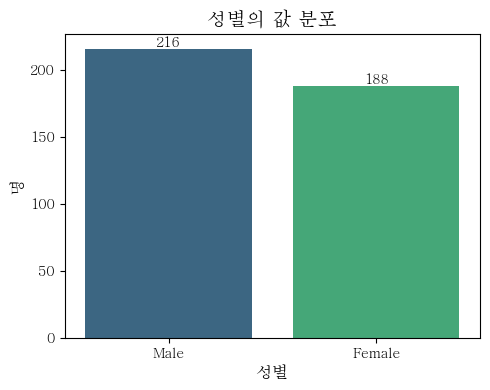

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7700\3280456930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')  # 값 분포


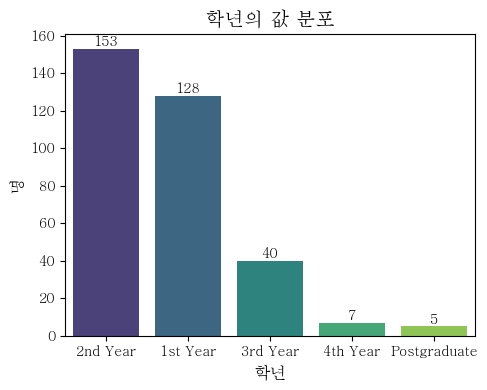

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7700\3280456930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')  # 값 분포


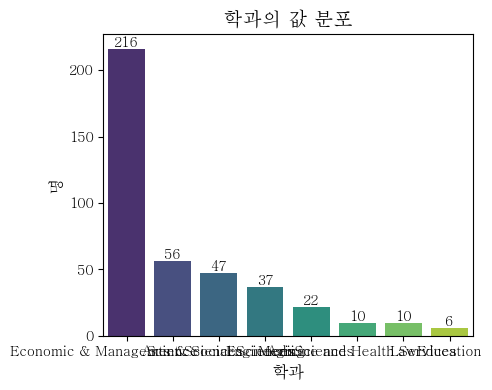

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7700\3280456930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')  # 값 분포


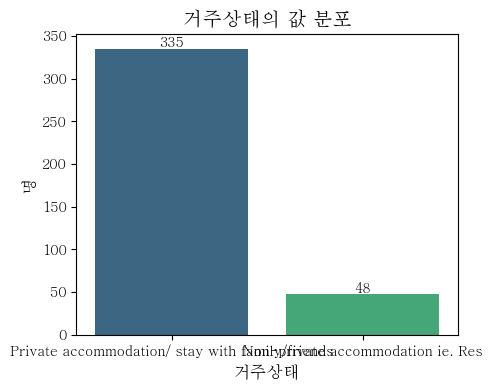

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7700\3280456930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')  # 값 분포


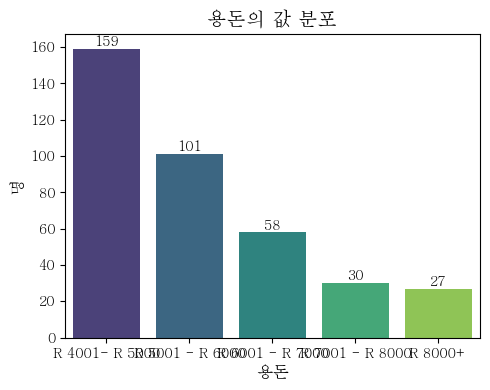

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7700\3280456930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')  # 값 분포


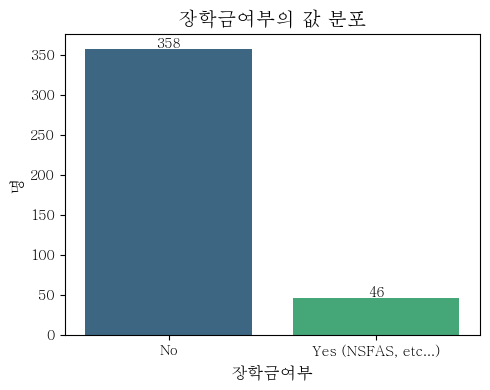

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7700\3280456930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')  # 값 분포


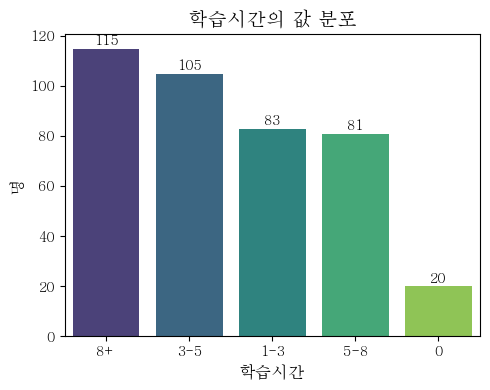

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7700\3280456930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')  # 값 분포


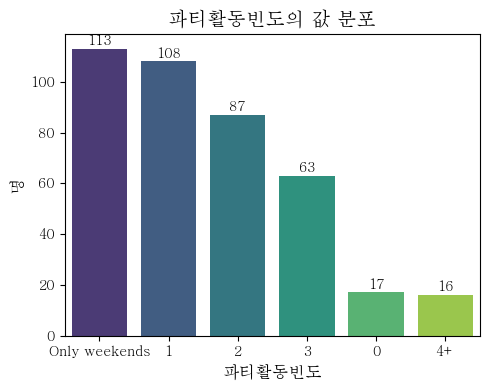

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7700\3280456930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')  # 값 분포


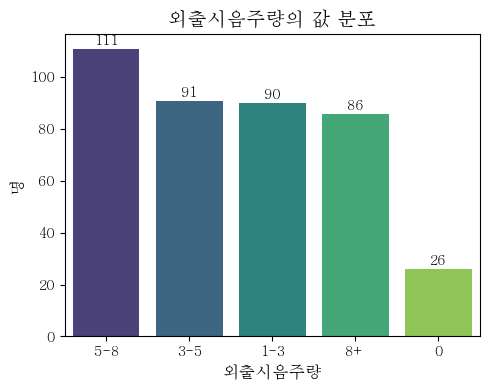

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7700\3280456930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')  # 값 분포


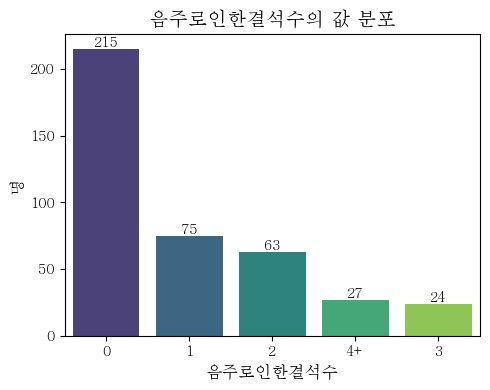

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7700\3280456930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')  # 값 분포


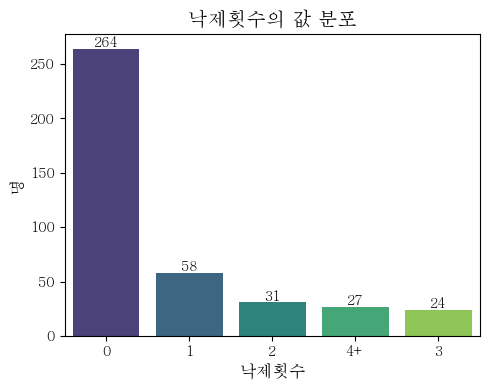

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7700\3280456930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')  # 값 분포


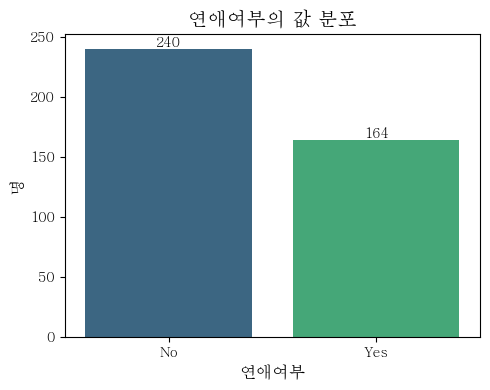

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7700\3280456930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')  # 값 분포


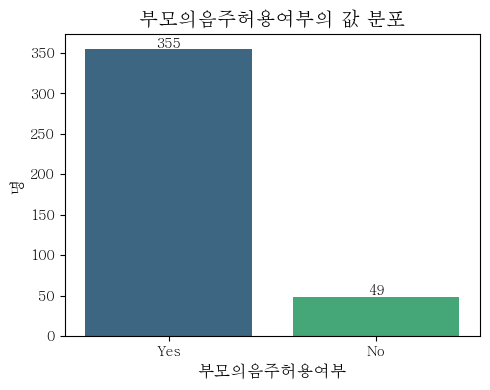

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7700\3280456930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')  # 값 분포


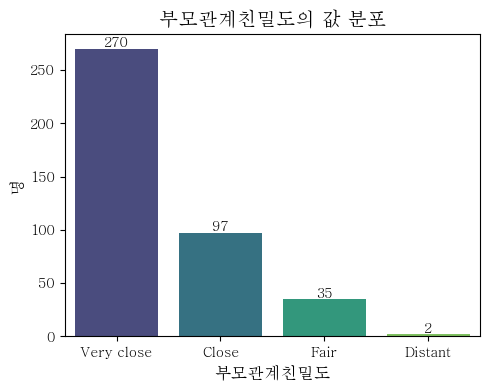

In [24]:
col_list = ['성별', '학년', '학과', '거주상태', '용돈', '장학금여부', '학습시간','파티활동빈도', '외출시음주량', '음주로인한결석수', '낙제횟수', '연애여부', '부모의음주허용여부', '부모관계친밀도']
for col in col_list:
    plt.figure(figsize=(5, 4))  # 그래프 크기 설정
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')  # 값 분포
    # 막대 위에 값 표시
    for patch in ax.patches:
        count = int(patch.get_height())  # 각 막대 높이 (값 개수)
        ax.text(
            patch.get_x() + patch.get_width() / 2,  # x좌표
            patch.get_height() + 1.5,  # y좌표 (막대 위 약간 띄움)
            count,  # 표시할 텍스트
            ha='center', fontsize=10, color='black'  # 텍스트 스타일
        )
    
    plt.title(f'{col}의 값 분포', fontsize=14)  # 그래프 제목
    plt.xlabel(col, fontsize=12)  # x축 라벨
    plt.ylabel('명', fontsize=12)  # y축 라벨
    # plt.xticks(rotation=45, ha='right')  # x축 값 회전 (필요 시)
    plt.tight_layout()  # 레이아웃 정리
    plt.show()

---

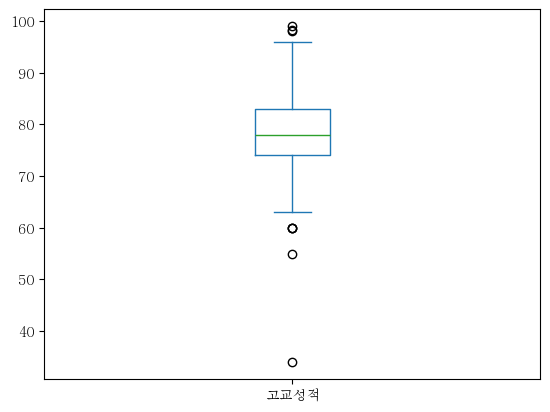

In [25]:
# 수치형은 박스플롯
df['고교성적'].plot(kind='box')
plt.show()

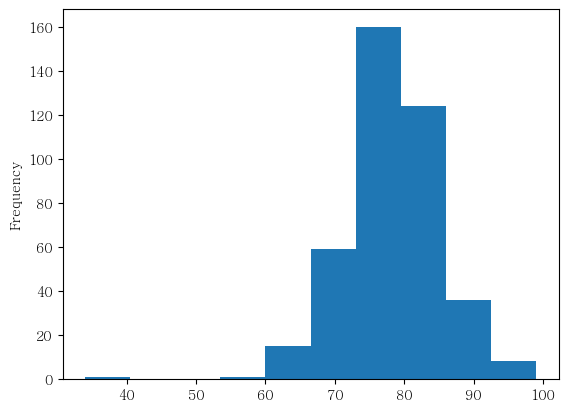

In [26]:
df['고교성적'].plot(kind='hist')
plt.show()

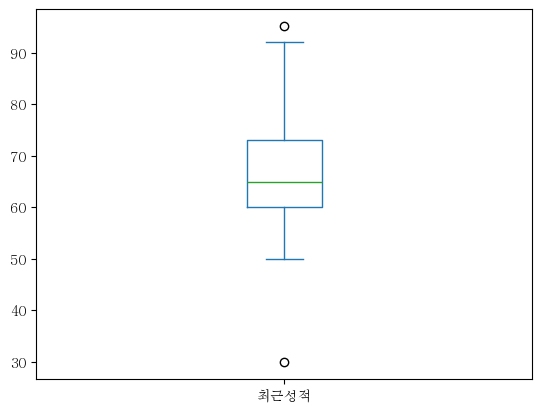

In [27]:
df['최근성적'].plot(kind='box')
plt.show()

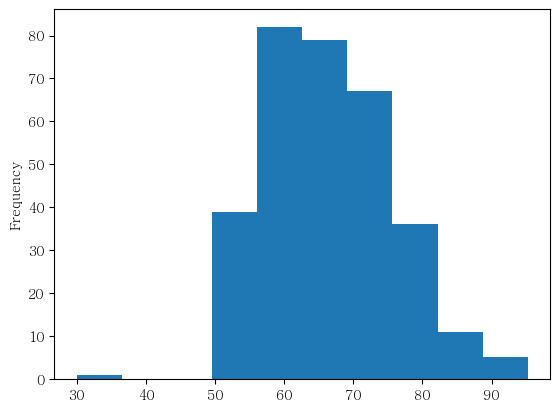

In [28]:
df['최근성적'].plot(kind='hist')
plt.show()

성적에는 100점 이상을 넘기지 않으므로 최저점과 최고점을 이상치로 보기 어려움
히스토그램을 보면 정규분포 형태로 평균값으로 대체함

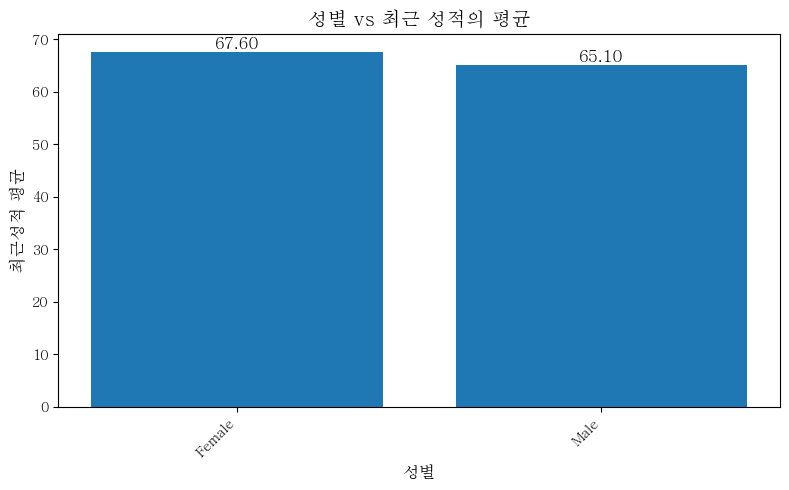

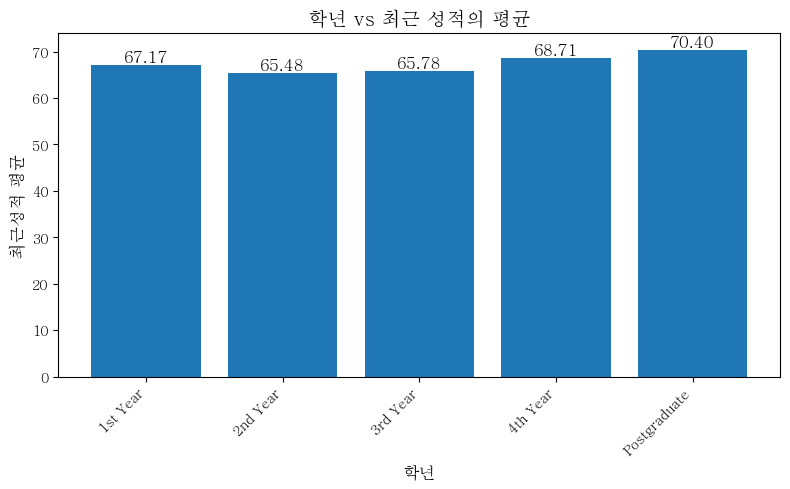

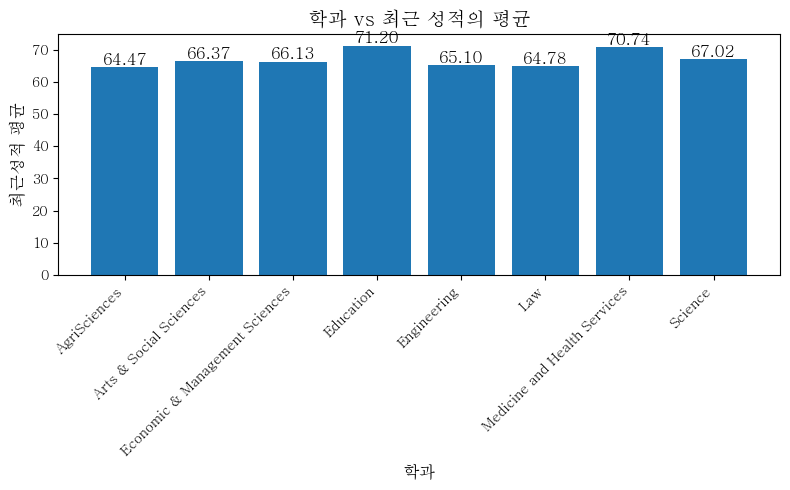

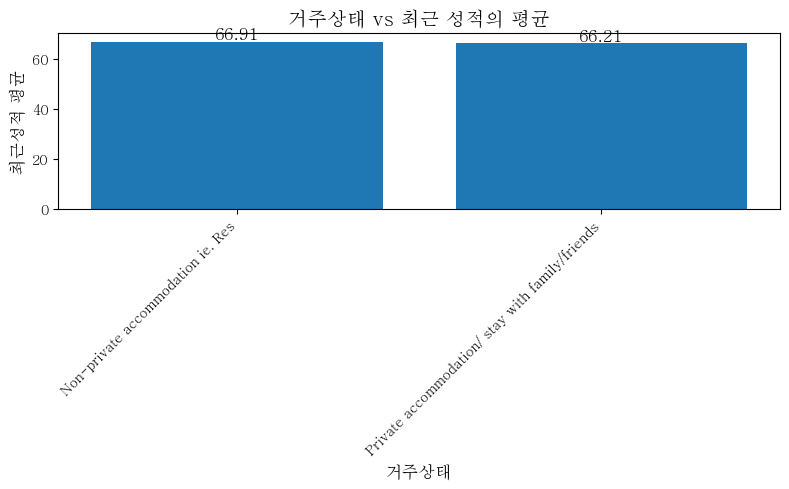

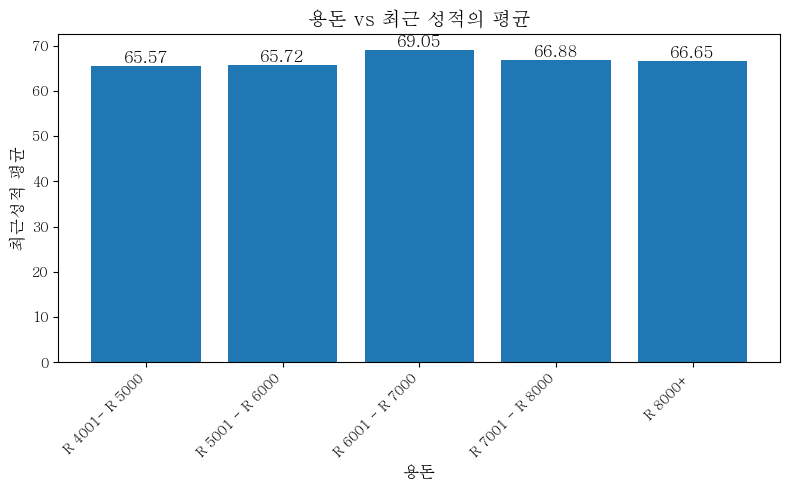

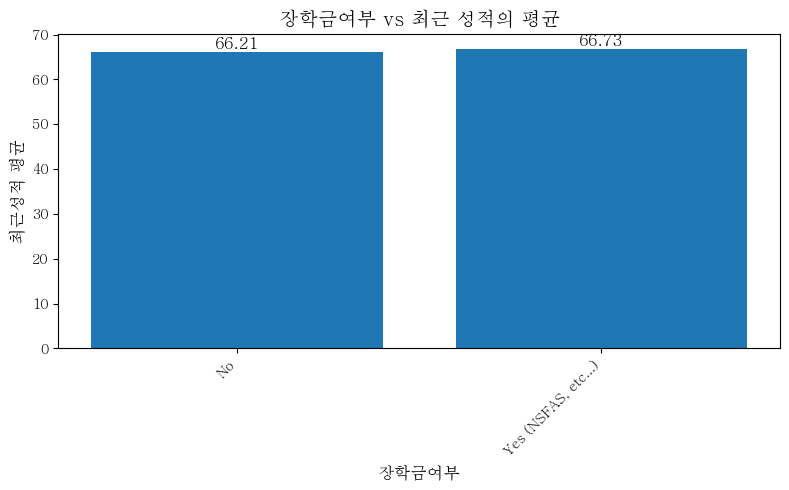

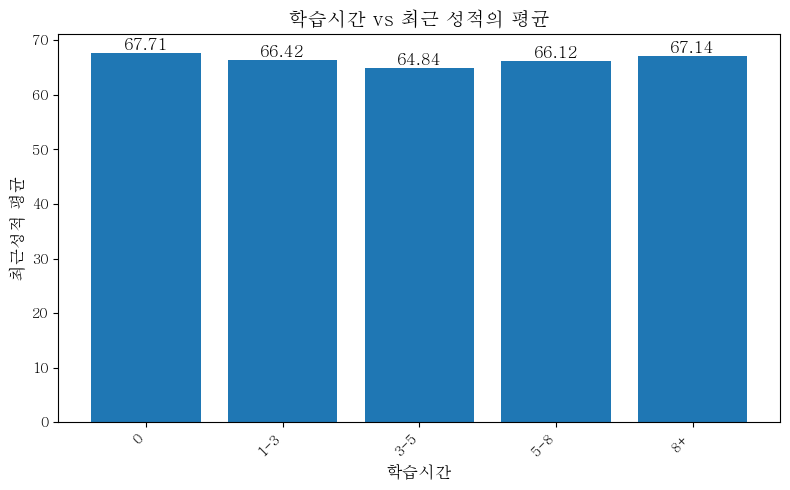

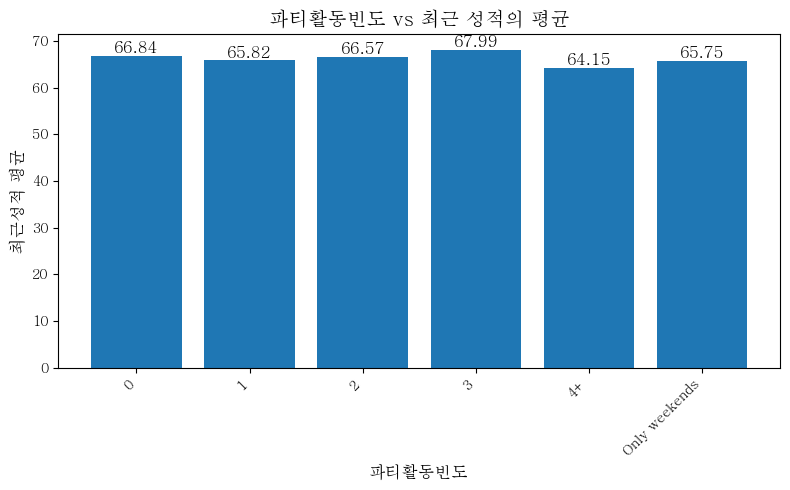

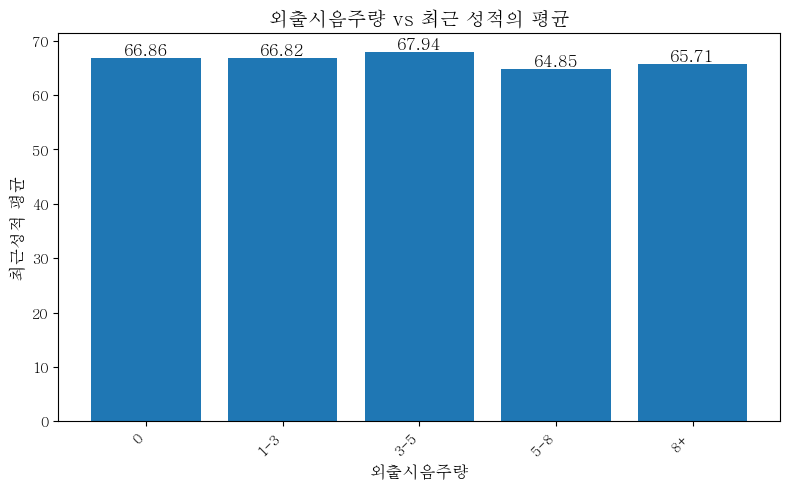

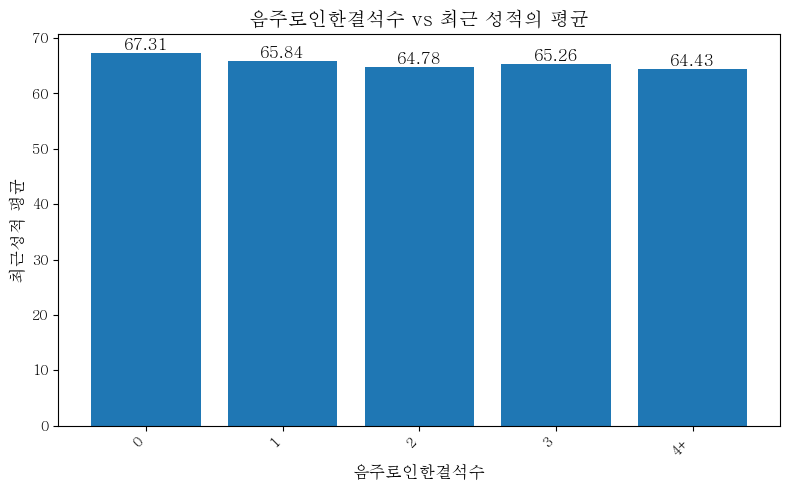

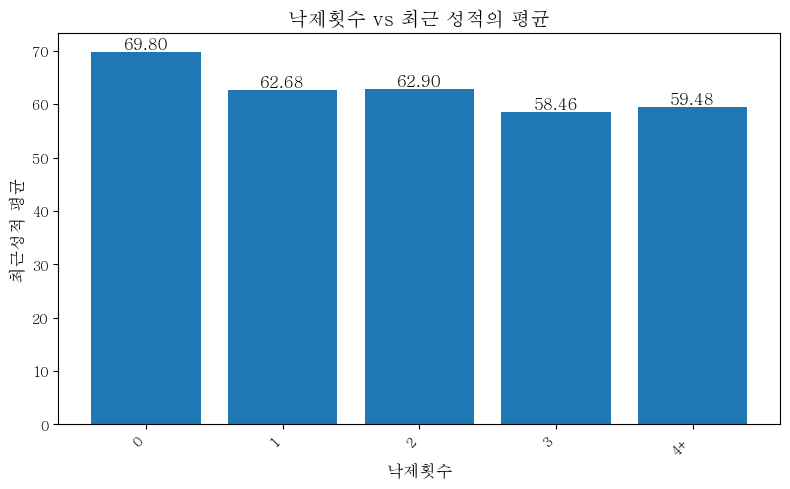

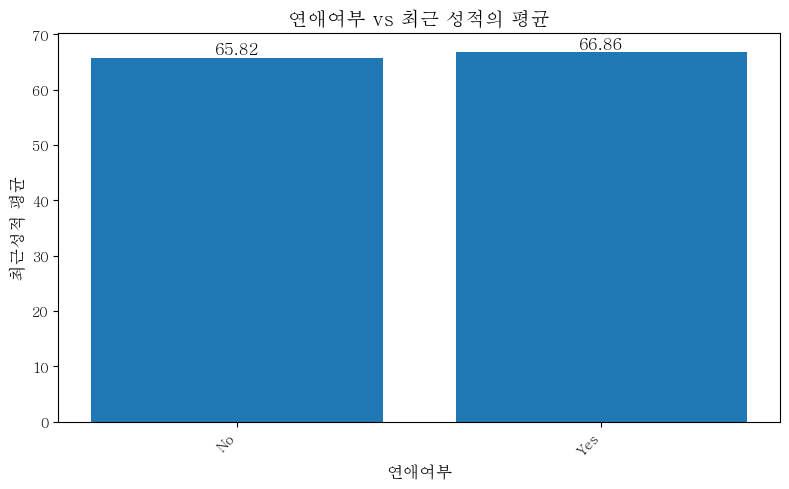

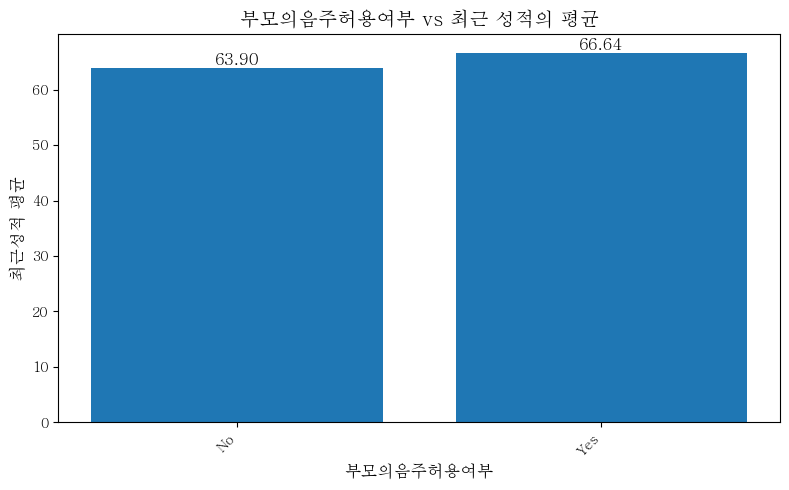

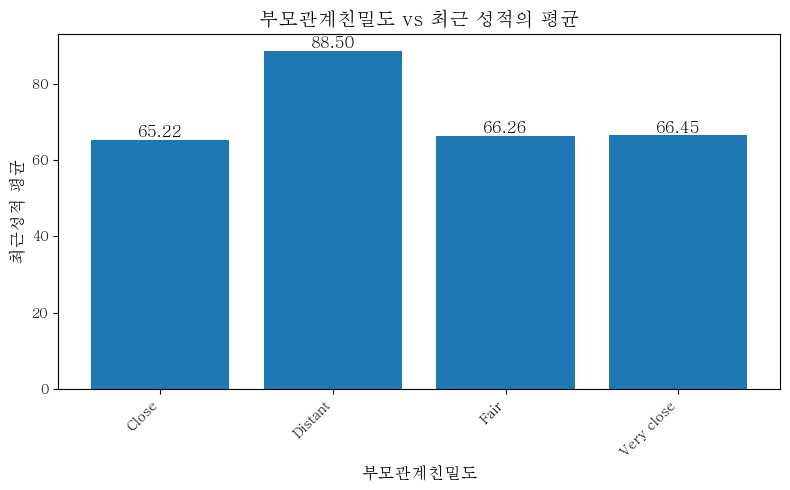

In [29]:
for col in col_list:  # 범주형 변수들
    plt.figure(figsize=(8, 5))  # 그래프 크기 설정
    
    # 각 범주별로 최근성적의 평균을 계산
    mean_values = df.groupby(col)['최근성적'].mean()
    
    # 막대그래프 생성
    bars = plt.bar(mean_values.index, mean_values.values)
    
    # 막대 위에 평균값 표시
    for bar in bars:
        yval = bar.get_height()  # 막대의 높이 (평균값)
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2,  # 텍스트 위치
                 f'{yval:.2f}', ha='center', va='bottom', fontsize=12)  # 값 표시
    
    # 제목 및 라벨 설정
    plt.title(f'{col} vs 최근 성적의 평균', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('최근성적 평균', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # x축 라벨 회전 (필요시)
    plt.tight_layout()  # 레이아웃 정리
    plt.show()

In [30]:
# 범주형은 막대그래프


In [31]:
# 데이터 결측치 처리 방식 (논리적 이유도 함께 작성)
# 평균으로 또는 최빈값으로
# 아니면 데이터 삭제

In [32]:
df.to_csv('./data/preprocessing_Data.csv',encoding='utf-8')